In [1]:
import numpy as np
import pandas as pd

In [7]:
path='../data/'
list_path= path+'driver_imgs_list.csv'
print(list_path)
image_dataset = pd.read_csv(list_path)

../data/driver_imgs_list.csv


In [8]:
image_dataset.head()


,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [9]:
x=image_dataset['img']
y=image_dataset['classname']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.20,train_size =0.80,random_state=43)

In [11]:
type(x_train)
y_val.size

4485

In [12]:
import os
import shutil
for i in range(0,x_train.size):
    cr_path ='../train/' + y_train.iloc[i] + '/'
    if (not os.path.exists(cr_path)):
        os.makedirs(cr_path)
    shutil.copyfile('../data/imgs/train/' + y_train.iloc[i] + '/' + x_train.iloc[i], '../train/' + y_train.iloc[i] + '/' + x_train.iloc[i])


In [13]:
for i in range(0,x_val.size):
    cr_path ='../validation/' + y_val.iloc[i] + '/'
    if (not os.path.exists(cr_path)):
        os.makedirs(cr_path)
    shutil.copyfile('../data/imgs/train/' + y_val.iloc[i] + '/' + x_val.iloc[i], '../validation/' + y_val.iloc[i] + '/' + x_val.iloc[i])


In [3]:
from keras.preprocessing.image import ImageDataGenerator
image_data_generator=ImageDataGenerator(
                        rescale=1./255,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)

/Users/manishashivshette/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
train_generator = image_data_generator.flow_from_directory(
        '../train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 17939 images belonging to 10 classes.


In [5]:
test_datagenerator = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagenerator.flow_from_directory(
        '../validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 4485 images belonging to 10 classes.


In [8]:
from keras.models import Sequential
from keras import regularizers, optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
steps_per_epoch_array = [100,200,300,1000,2000]
epochs_array = [10,20,30,40,50]
validation_steps_array=[100,200,300,400,800]
history=model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epoch_array[4],
        epochs=epochs_array[0],
        validation_data=validation_generator,
        validation_steps=validation_steps_array[4])

Epoch 1/10
2000/2000 [==============================] - 954s 477ms/step - loss: 1.3436 - acc: 0.5332 - val_loss: 0.3781 - val_acc: 0.8992
Epoch 2/10
2000/2000 [==============================] - 929s 465ms/step - loss: 0.4723 - acc: 0.8499 - val_loss: 0.1608 - val_acc: 0.9596
Epoch 3/10
2000/2000 [==============================] - 901s 451ms/step - loss: 0.2858 - acc: 0.9135 - val_loss: 0.1327 - val_acc: 0.9654
Epoch 4/10
2000/2000 [==============================] - 878s 439ms/step - loss: 0.2251 - acc: 0.9336 - val_loss: 0.0867 - val_acc: 0.9780
Epoch 5/10
2000/2000 [==============================] - 5061s 3s/step - loss: 0.2055 - acc: 0.9384 - val_loss: 0.0734 - val_acc: 0.9824
Epoch 6/10
2000/2000 [==============================] - 922s 461ms/step - loss: 0.1991 - acc: 0.9414 - val_loss: 0.0764 - val_acc: 0.9839
Epoch 7/10
2000/2000 [==============================] - 885s 442ms/step - loss: 0.1919 - acc: 0.9435 - val_loss: 0.0695 - val_acc: 0.9815
Epoch 8/10
2000/2000 [==============

In [13]:
model.metrics_names
result=model.evaluate_generator(generator=validation_generator,steps=4485)

In [21]:
print("Model loss is %f accuracy is %f "%(result[0],result[1]))

Model loss is 0.057108 accuracy is 0.986177 


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


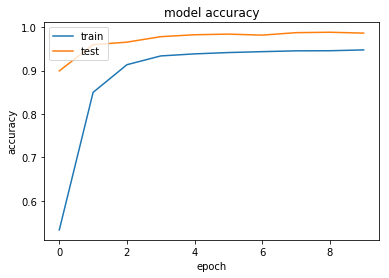

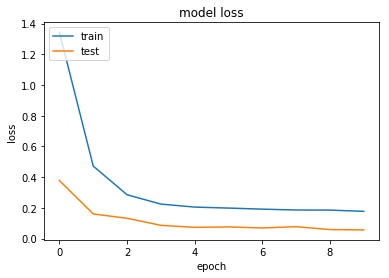

In [11]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
from keras.models import load_model

model.save('model_using_keras-64.h5')


In [14]:
from keras.models import load_model

s_model = load_model('model_using_keras-64.h5')

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

path = "../data/imgs/test/img_1.jpg"
image = load_img(path, target_size=(64,64))

image_arr = img_to_array(image) # convert from PIL Image to NumPy array
# the dimensions of image should now be (150, 150, 3)

# to be able to pass it through the network and use batches, we want it with shape (1, 150, 150, 3)
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

image_arr /= 255

(1, 64, 64, 3)


In [17]:
prediction_array = s_model.predict(image_arr)
print(prediction_array)

[[2.4228375e-11 4.4582648e-13 1.8290578e-09 2.7195670e-12 6.4625756e-11
  1.0000000e+00 7.4100018e-11 2.5254552e-09 2.8148890e-09 3.7776449e-09]]


In [18]:
answer = np.argmax(prediction_array)
print(answer)

5
